In [ ]:
!git clone https://github.com/KVasq/dwr_detection.git

In [ ]:
!pip install sktime

In [1]:
import pandas as pd
import numpy as np
import keras 
import sktime
import tensorflow.keras.backend as K

In [2]:
data = pd.read_csv('Temp_Sal_Oxy_Hourly_09_19.csv')
pd.set_option("max_rows", None)
data.tail()


,Unnamed: 0,Celsius,ML_L,PSU,Time
8003,8004,9.396323,2.950113,31.124988,2019-12-28 12:30:00
8004,8005,9.425937,2.908023,31.116441,2019-12-29 00:30:00
8005,8006,9.408752,2.932251,31.120377,2019-12-29 12:30:00
8006,8007,9.437130,2.904944,31.115044,2019-12-30 00:30:00
8007,8008,9.414845,2.921852,31.118624,2019-12-30 12:30:00


In [3]:
from numpy import array 

def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [63]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sktime.utils.plotting import plot_series
import tensorflow as tf
from sktime.forecasting.model_selection import temporal_train_test_split


# choose a number of time steps
n_steps_in, n_steps_out = 728, 728

data_train, data_test = temporal_train_test_split(data['Celsius'], test_size = 0.2)

X, Y_test = split_sequence(data_train, n_steps_in=n_steps_in, n_steps_out=n_steps_out)

X = X.reshape((X.shape[0], X.shape[1], 1))

print(X.shape)
print(Y_test.shape)

(4951, 728, 1)
(4951, 728)


In [65]:
model = Sequential()
model.add(LSTM(100, activation='tanh', return_sequences=True, input_shape=(n_steps_in, 1)))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')

model.fit(X, Y_test, epochs=100)

Epoch 1/100
155/155 [==============================] - 15s 89ms/step - loss: 17.7590
Epoch 2/100
155/155 [==============================] - 13s 87ms/step - loss: 0.2338
Epoch 3/100
155/155 [==============================] - 14s 89ms/step - loss: 0.2329
Epoch 4/100
155/155 [==============================] - 14s 92ms/step - loss: 0.2330
Epoch 5/100
155/155 [==============================] - 15s 96ms/step - loss: 0.2330
Epoch 6/100
155/155 [==============================] - 15s 94ms/step - loss: 0.2330
Epoch 7/100
155/155 [==============================] - 14s 91ms/step - loss: 0.2332
Epoch 8/100
155/155 [==============================] - 14s 92ms/step - loss: 0.2333
Epoch 9/100
155/155 [==============================] - 14s 93ms/step - loss: 0.2333
Epoch 10/100
155/155 [==============================] - 15s 95ms/step - loss: 0.2334
Epoch 11/100
155/155 [==============================] - 14s 92ms/step - loss: 0.2336
Epoch 12/100
155/155 [==============================] - 14s 91ms/step - l

In [15]:
X.shape

(4163, 2184, 1)

In [66]:
n_steps_in = 728
n_steps_out = 728
X_input, Y_test = split_sequence(data_test, n_steps_in=n_steps_in, n_steps_out=n_steps_out)
X_input.shape

(147, 728)

In [67]:
#X_input = X_input.reshape((1, n_steps_in, -1))
X_input = X_input.reshape((X_input.shape[0], X_input.shape[1], 1))
X_input.shape

(147, 728, 1)

In [30]:
X_input[0,:,0].shape

(1400,)

In [13]:
Y_test.shape

(143, 60)

In [68]:
y_pred = model.predict(X_input)

In [49]:
y_pred[0].ndim

1

In [44]:
pred = np.reshape(y_pred[0], -1)
type(pred)

numpy.ndarray

In [69]:
input_ = pd.Series(X_input[0,:,0])

In [70]:
test_ = pd.Series(Y_test[0], index=range(input_.index[-1],input_.index[-1]+len(Y_test[0])))

In [71]:
pred_ = pd.Series(y_pred[0], index=test_.index)

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

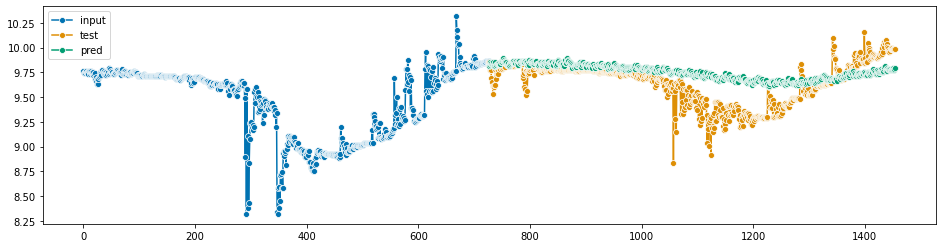

In [72]:
plot_series(input_, test_, pred_, labels=["input", "test", "pred"])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

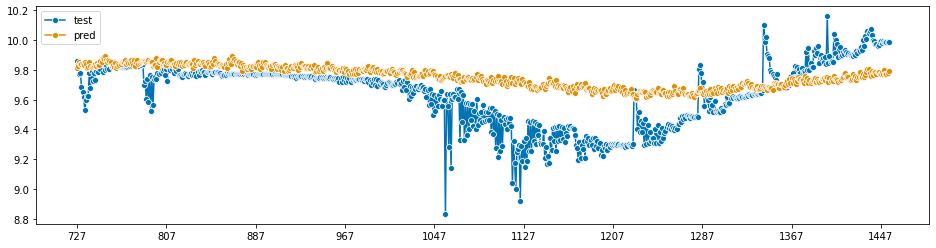

In [73]:
plot_series(test_, pred_, labels=["test", "pred"])

# AutoLSTM

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K

In [ ]:
### CREATE TRAIN/TEST PRICE DATA ###

data = pd.read_csv('Temp_Sal_Oxy_Hourly_09_19.csv')

col = ['ML_L', 'PSU']

X_train, X_test = [], []
y_train, y_test = [], []

#per each combination of region, type and test_flag, retrieve values and df of each combo
    
from numpy import array 

from sktime.forecasting.model_selection import temporal_train_test_split

data_train, data_test = temporal_train_test_split(data, test_size = 0.2)

len(data_test)

In [ ]:
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)   
 
y_train, y_test = split_sequence(data_train['Celsius'], 1448, 60)

X_train, X_test = split_sequence(data_train[['PSU', 'ML_L']], 1448, 60)



In [ ]:
def set_seed(seed):
    
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    random.seed(seed)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1,X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1,X_test.shape[-1])).reshape(X_test.shape)

In [ ]:
set_seed(33)

### DEFINE LSTM AUTOENCODER ###

inputs_ae = Input(shape=(X_train.shape[1:]))
encoded_ae = LSTM(128, return_sequences=True, dropout=0.5)(inputs_ae, training=True)
decoded_ae = LSTM(32, return_sequences=True, dropout=0.5)(encoded_ae, training=True)
out_ae = TimeDistributed(Dense(1))(decoded_ae)

sequence_autoencoder = Model(inputs_ae, out_ae)
sequence_autoencoder.compile(optimizer='adam', loss='mse')

### TRAIN AUTOENCODER ###
es = EarlyStopping(patience=6, verbose=2, min_delta=0.001, monitor='val_loss', mode='auto', restore_best_weights=True)
sequence_autoencoder.fit(X_train, X_train, validation_data=(X_train, X_train),
                         batch_size=64, epochs=50, verbose=1, callbacks=[es])

In [ ]:
encoder = Model(inputs_ae, encoded_ae)
X_train_ = np.concatenate([X_train, encoder.predict(X_train)], axis=-1)
X_test_ = np.concatenate([X_test, encoder.predict(X_test)], axis=-1)

X_train_.shape, X_test_.shape

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [ ]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()